In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as rcParams


In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.rename(columns = {'Annual Income (k$)': 'Annual_Income','Spending Score (1-100)': 'Spending_Score'})
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual_Income  Spending_Score
0             1    Male   19             15              39
1             2    Male   21             15              81
2             3  Female   20             16               6
3             4  Female   23             16              77
4             5  Female   31             17              40
..          ...     ...  ...            ...             ...
195         196  Female   35            120              79
196         197  Female   45            126              28
197         198    Male   32            126              74
198         199    Male   32            137              18
199         200    Male   30            137              83

[200 rows x 5 columns]>

In [6]:
df.Gender.unique()


array(['Male', 'Female'], dtype=object)

In [7]:

df.Age.unique()


array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [8]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

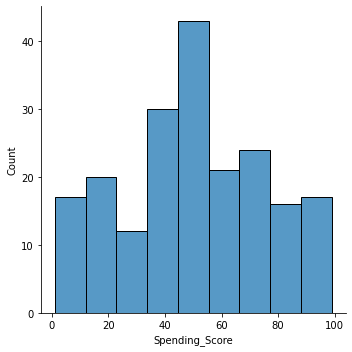

In [9]:
sns.displot(df.Spending_Score)

([<matplotlib.patches.Wedge at 0xaf49dc0>,
 [Text(-0.20611945413751356, 1.080515974257694, ''),
  Text(0.24359571852615253, -1.2769734241227293, '')],
 [Text(-0.11242879316591647, 0.5893723495951058, '156.0%'),
  Text(0.14990505755455538, -0.7858297994601411, '144.0%')])

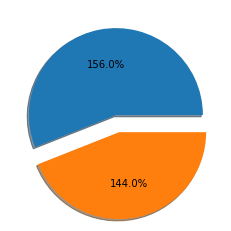

In [10]:
plt.pie(df.Gender.value_counts(),[0,0.2],shadow='True',autopct="1%.1f%%")  

<AxesSubplot:xlabel='Age', ylabel='Density'>

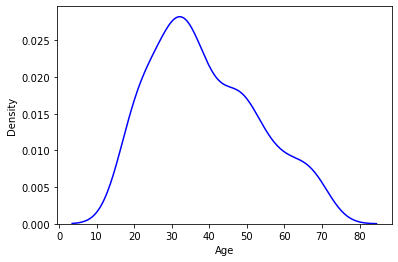

In [11]:
sns.kdeplot(df.Age,color="blue")

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


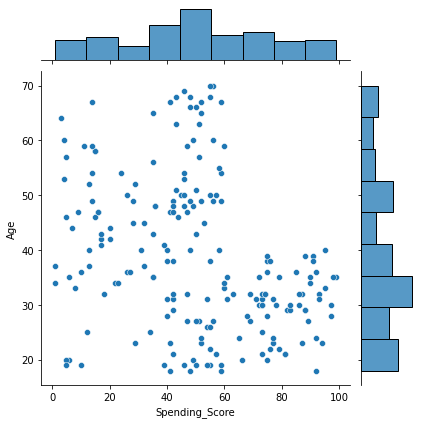

In [12]:
sns.jointplot(df.Spending_Score,df.Age)

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual_Income'>

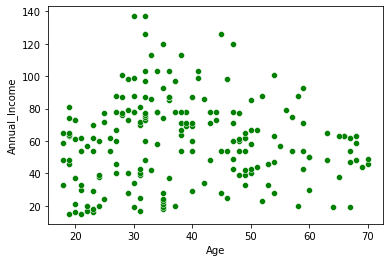

In [13]:
sns.scatterplot(df.Age,df.Annual_Income,color="green")

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'LinePlot')

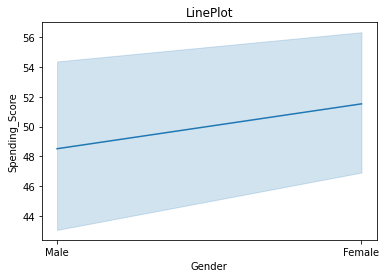

In [14]:
sns.lineplot(df.Gender,df.Spending_Score)
plt.xlabel('Gender')
plt.ylabel('Spending_Score')
plt.title('LinePlot')

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Spending_Score'}>]], dtype=object)

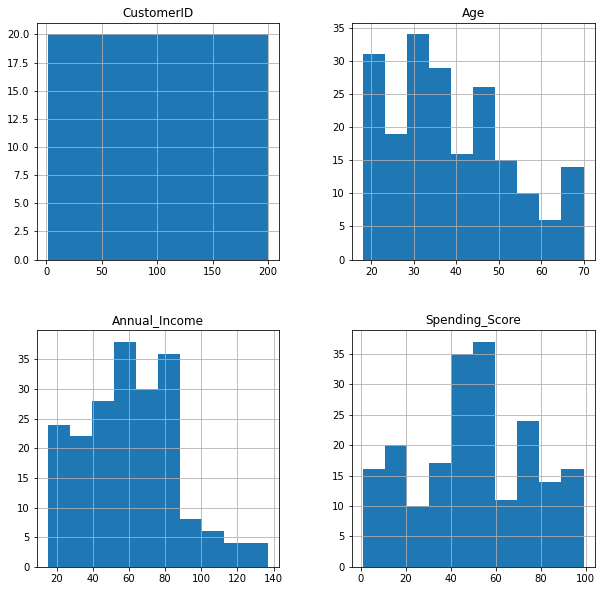

In [15]:
df.hist(figsize=(10,10))

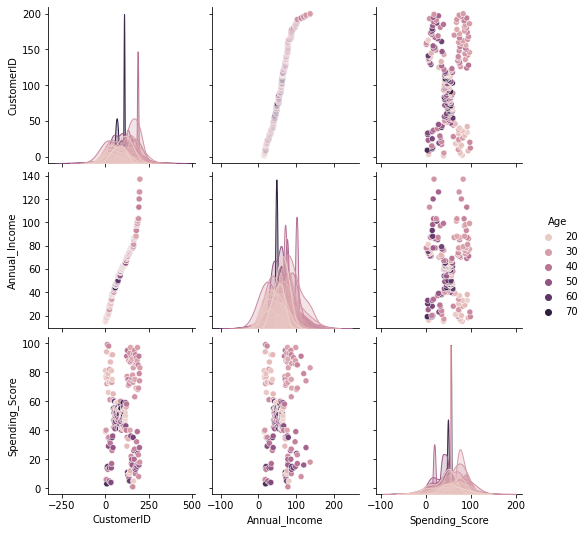

In [16]:
sns.pairplot(df,kind='scatter',hue='Age')

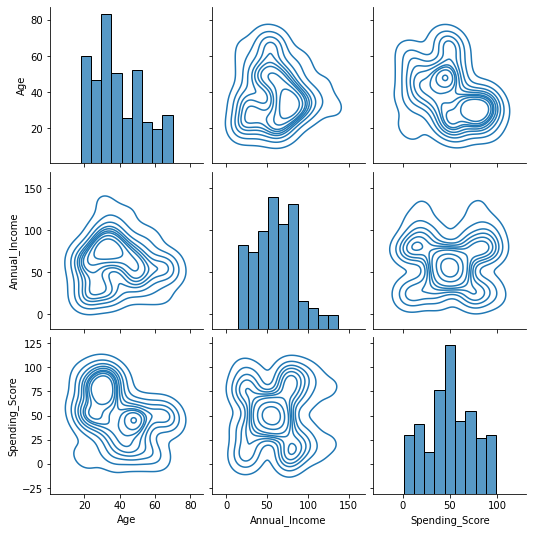

In [17]:
sns.pairplot(data=df[['Age','Annual_Income','Spending_Score']],kind='kde',diag_kind='hist')

In [18]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
df.isnull().any() 

CustomerID        False
Gender            False
Age               False
Annual_Income     False
Spending_Score    False
dtype: bool

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

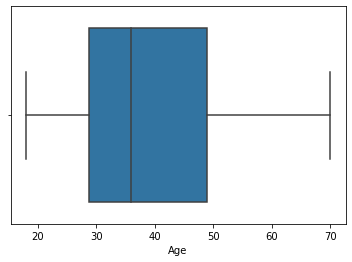

In [20]:
sns.boxplot(df.Age) 

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [22]:
from sklearn import cluster
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
error

[975512.06,
 387065.7137713772,
 271384.50878286787,
 195401.19855991477,
 157157.757905983,
 122625.19813553884,
 103233.01724386725,
 86053.67444777439,
 76938.97565600359,
 69231.3360761156]

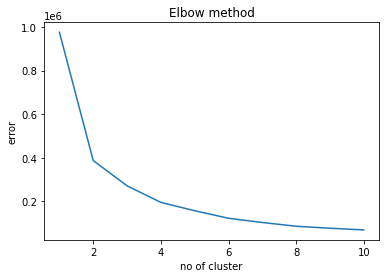

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of cluster')
plt.ylabel('error')
plt.show()

In [25]:
k_means_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)


In [26]:
k_means_model.fit(df)


KMeans(n_clusters=3, random_state=0)

In [27]:

clustered_data =k_means_model.predict(df)

In [28]:
df['Clustered_data'] = pd.Series(clustered_data)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Clustered_data
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [29]:
y=df['Clustered_data']
y

0      0
1      0
2      0
3      0
4      0
      ..
195    2
196    2
197    2
198    2
199    2
Name: Clustered_data, Length: 200, dtype: int32

In [30]:
X=df.drop(columns=['Clustered_data'],axis=1)
X.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [31]:
from sklearn.preprocessing import scale
data=pd.DataFrame(scale(X),columns=X.columns)
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=1)
X_train.shape,X_test.shape


((140, 5), (60, 5))

In [33]:
y_train.shape,y_test.shape

((140,), (60,))

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train) 

KNeighborsClassifier()

In [35]:
pred_train = model.predict(X_train)
pred_train 

array([1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 0])

In [36]:
y_test

58     0
40     0
34     0
102    1
184    2
198    2
95     1
4      0
29     0
168    2
171    2
18     0
11     0
89     1
110    1
118    1
159    2
35     0
136    2
59     0
51     0
16     0
44     0
94     1
31     0
162    2
38     0
28     0
193    2
27     0
47     0
165    2
194    2
177    2
176    2
97     1
174    2
73     1
69     1
172    2
108    1
107    1
189    2
14     0
56     0
19     0
114    1
39     0
185    2
124    1
98     1
123    1
119    1
53     0
33     0
179    2
181    2
106    1
199    2
138    2
Name: Clustered_data, dtype: int32

In [37]:
pred_test=model.predict(X_test)
pred_test 

array([0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0,
       0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2])

In [38]:
pred = pd.DataFrame({'Actual_value':y_test,'Predicted_value_using_KNN':pred_test})
pred.head()

,Actual_value,Predicted_value_using_KNN
58,0,0
40,0,1
34,0,0
102,1,1
184,2,2


In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('Training accuracy: ',accuracy_score(y_train,pred_train))
print('Testing accuracy: ',accuracy_score(y_test,pred_test))

Training accuracy:  0.9214285714285714
Testing accuracy:  0.9166666666666666


In [40]:
pd.crosstab(y_test,pred_test)

col_0,0,1,2
Clustered_data,,,
0,19,4,0
1,1,16,0
2,0,0,20


In [41]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.80      0.94      0.86        17
           2       1.00      1.00      1.00        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

